# Additional Coding

In [5]:
library(FNN)
library(ggplot2)

rm(list=ls())
ntrain <- 50 # Training
ntest <- 500 # Testing
nrep <- 100 # repeat 100 times
p <- 20
puse <- c(1, 2, 3, 4, 10, 20) # number of predictors
k <- c(1:9)

sigma <- 0.025

Xtrain <- matrix(runif(ntrain * p, -1, 1), ntrain, p)
Xtest <- matrix(runif(ntest * p, -1, 1), ntest, p)
y0 <- sin(2 * Xtrain[, 1]) # Only the first predictor is related to y
ytest <- sin(2 *  Xtest[, 1])

out_knn <- data.frame() # Output results
out_lm <- data.frame()

In [6]:
for(i in 1:length(puse)){
  yhat_lm <- matrix(0, ntest, nrep)
  yhat_knn <- replicate(length(k), matrix(0, ntest, nrep))

  for(l in 1:nrep){
    df_train <- data.frame(x=Xtrain[,1:puse[i]])
    y <- y0 + rnorm(ntrain, 0, sigma)

    ######### DO: fit linear regression using lm funciton, assign predicted value to yhat_lm[,l] #########
    fit_lm <- lm(y ~ ., data = df_train)
    testdata = data.frame(x=Xtest[, 1:puse[i]])
    yhat_lm[, l] <- predict(fit_lm, newdata=testdata) # Predicted value by lm
    
    for(j in 1:length(k)){
      ######### DO: fit knn using knn.reg funciton, assign predicted value to yhat_knn[, l, j] #########
      fit_knn <- knn.reg(
        train = df_train, 
        y = y, 
        test = testdata, 
        k = j, 
      ) 
      yhat_knn[, l, j] <- fit_knn$pred # Predicted value by knn.reg
    }
  #  cat(i, "-th p, ", l, "-th repitition finished. \n")
  }
  
  ######### DO: compute bias and variance of linear regression #########
  
  # Compute mean of predicted values
  ybar_lm <- rowMeans(yhat_lm) # E(f^hat)
    
  # Compute bias^2
  biasSQ_lm <- mean((ytest - ybar_lm)^2) # E[ (f - E(f^hat))^2 ]
  
  # Compute variance
  variance_lm <- mean((ybar_lm - yhat_lm)^2)# E[ (E(f^hat) - f^hat)^2 ]
  
  # Compute total MSE
  err_lm <- biasSQ_lm + variance_lm
  # 
  out_lm <- rbind(out_lm, data.frame(error = biasSQ_lm, component = "squared-bias", p = paste0("p = ", puse[i])))
  out_lm <- rbind(out_lm, data.frame(error = variance_lm, component = "variance", p = paste0("p = ", puse[i])))
  out_lm <- rbind(out_lm, data.frame(error = err_lm, component = "MSE", p = paste0("p = ", puse[i])))


  ######### DO: compute bias and variance of knn regression #########

  # Compute mean of predicted values
  ybar_knn <- colMeans(aperm(yhat_knn, c(2,1,3)), dims=1)# E(f^hat)

  # Compute bias^2
  biasSQ_knn <- colMeans((ybar_knn - ytest)^2) # E[ (f - E(f^hat))^2 ]

  # Compute variance
  variance_knn <- c() # E[ (E(f^hat) - f^hat)^2 ]
  for(j in 1:length(k)){
    variance_knn <- append(variance_knn, mean(ybar_knn[,j] - yhat_knn[,,j]))
  }
  
  # Compute total MSE
  err_knn <- variance_knn + biasSQ_knn

  out_knn <- rbind(out_knn, data.frame(error = biasSQ_knn, component = "squared-bias", K = 1/k,p = paste0("p = ", puse[i])))
  out_knn <- rbind(out_knn, data.frame(error = variance_knn, component = "variance", K = 1/k, p = paste0("p = ", puse[i])))
  out_knn <- rbind(out_knn, data.frame(error = err_knn, component = "MSE", K = 1/k, p = paste0("p = ", puse[i])))

    
  cat(i, "-th p, ", "-th repitition finished. \n")

}

1 -th p,  -th repitition finished. 
2 -th p,  -th repitition finished. 
3 -th p,  -th repitition finished. 
4 -th p,  -th repitition finished. 
5 -th p,  -th repitition finished. 
6 -th p,  -th repitition finished. 


## Plots

### Linear Regression

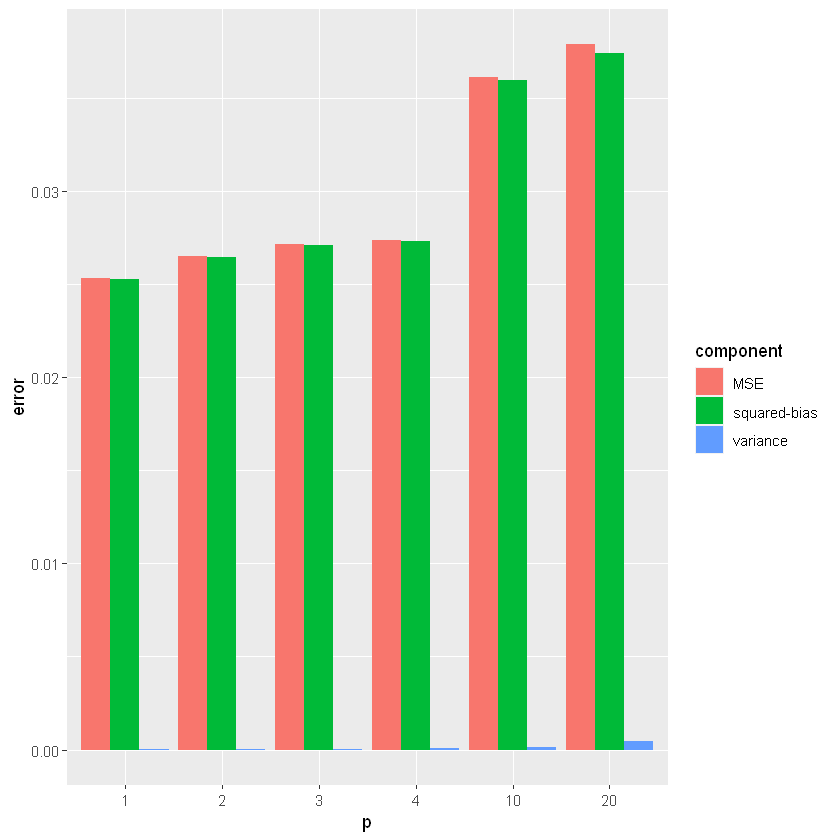

In [21]:
lm_histo <- ggplot(out_lm, aes(fill=component, y=error, x=p)) + 
  geom_bar(position="dodge", stat="identity") +
  scale_x_discrete(limits = c("p = 1","p = 2","p = 3","p = 4","p = 10","p = 20"), labels=puse)
lm_histo

### KNN regression

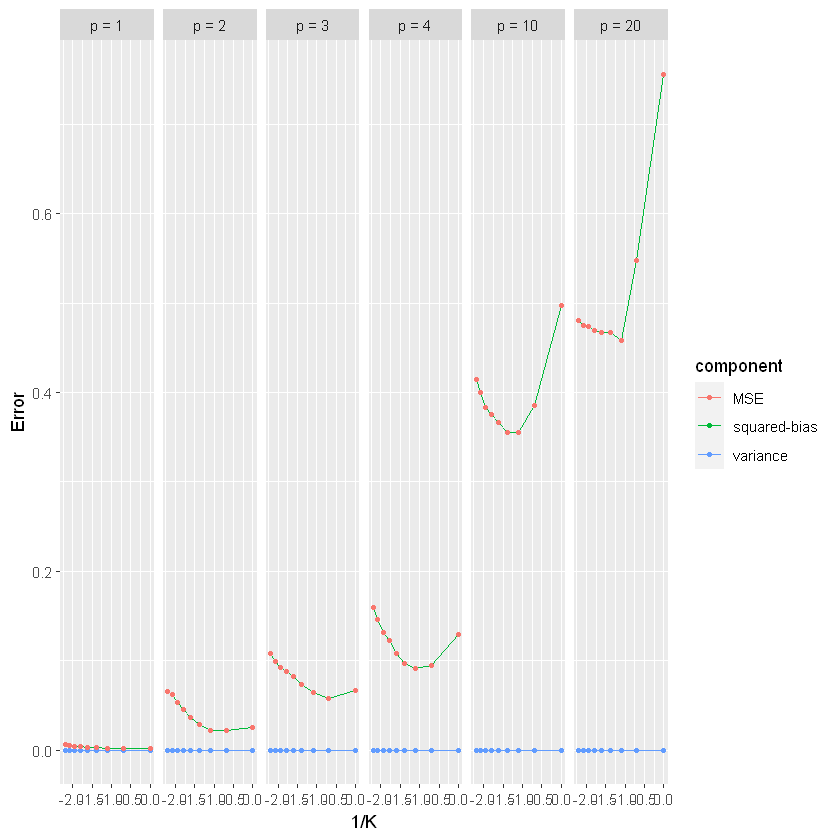

In [13]:
knn_plot <- ggplot(
          out_knn, 
          aes(x=log(K), y=error, col=component)
        ) + 
        geom_line() + 
        geom_point(size=1) +
        facet_grid(. ~ factor(x = p, levels = c("p = 1","p = 2","p = 3","p = 4","p = 10","p = 20"))
        ) + 
        labs(x="log(1/K)", y="Error") 
knn_plot

### Regression summary

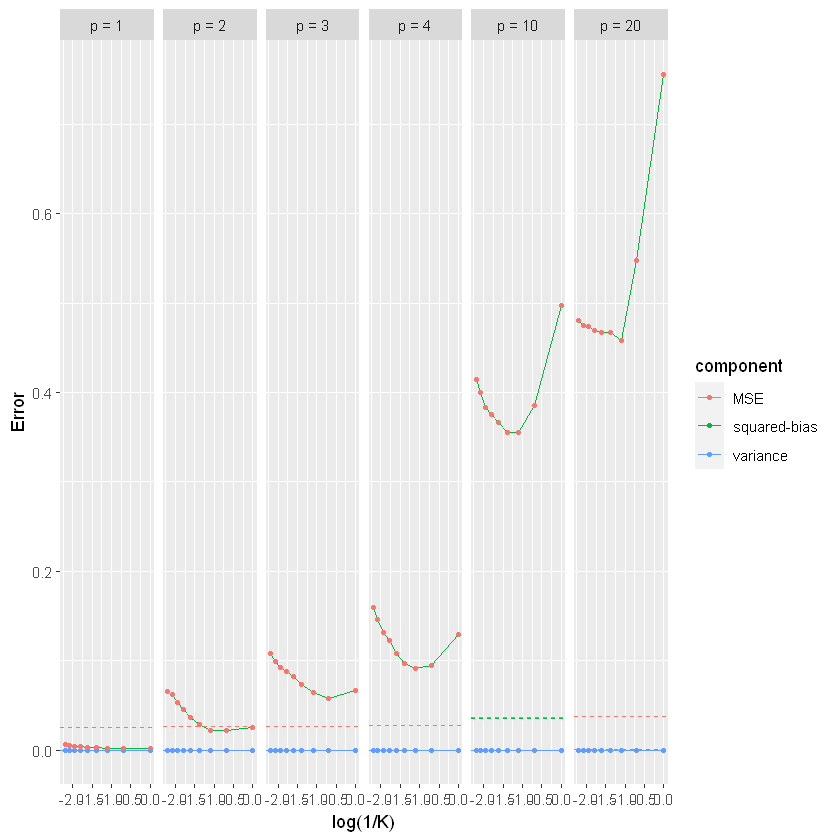

In [20]:
summary_plot <- ggplot(
          out_knn, 
          aes(x=log(K), y=error, col=component)
        ) + 
        geom_line() + 
        geom_point(size=1) +
        geom_hline(
          data = out_lm, 
          aes(yintercept = error, col = component),
          linetype="dashed"
        ) + 
        facet_grid(. ~ factor(x = p, levels = c("p = 1","p = 2","p = 3","p = 4","p = 10","p = 20"))
        ) + 
        labs(x="log(1/K)", y="Error") 
summary_plot